In [42]:
# import libraries
import torch
from torch_geometric.nn import GCNConv, ChebConv, GATConv, RGCNConv # , DCRNNConv
from torch_geometric.data import Data, DataLoader # , temporal_signal_split

from torch_geometric_temporal.dataset import ChickenpoxDatasetLoader
import numpy as np
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt


# Create graph rep using network x from adjacency matrix

In [7]:
# Load statics for wing disc geometries

folder_path = r"C:\Users\steph\Box\ZartmanLabGroupFolder\Zartman_Dowling\Stephen\MC2021_Data" 
disc_vertices = np.load(os.path.join(folder_path, "geometry", "disc_vertices.npy"), allow_pickle=True).item()  # Vertices
disc_laplacians = np.load(os.path.join(folder_path, "geometry", "disc_sizes_laplacian.npy"), allow_pickle=True).item()  # Laplacian Matrix
disc_adjs = np.load(os.path.join(folder_path, "geometry", "disc_sizes_adj.npy"), allow_pickle=True).item()  # Adjacency matrix


In [61]:
sizes = ['xsmall', 'small', 'medium', 'large']
size = sizes[0]  # Change index to change size


adj_matrix = disc_adjs[size]
lap_matrix = disc_laplacians[size]
vertices = disc_vertices[size]

# Calculate centroids of vertices
centroids = np.zeros((len(vertices), 2))
for i, cell in enumerate(vertices):
    centroid_x = np.mean(cell[:, 0])
    centroid_y = np.mean(cell[:, 1])

    centroids[i] = [centroid_x, centroid_y]

print(centroids)
print(centroids.shape)


[[ 677.78173405 -514.30729037]
 [ 678.12330441 -492.8205683 ]
 [ 680.91063071 -471.03034163]
 [ 685.00641428 -504.11730014]
 [ 686.08359557 -481.4796662 ]
 [ 688.91269823 -518.2994209 ]
 [ 688.10283901 -458.98396273]
 [ 691.37571627 -491.76421107]
 [ 694.14530688 -509.97009132]
 [ 696.45683966 -549.61150584]
 [ 692.48422926 -532.16241746]
 [ 693.87845489 -470.39621377]
 [ 698.59676279 -501.8630026 ]
 [ 699.56431158 -459.79248869]
 [ 703.80535692 -516.34107351]
 [ 699.66685452 -480.76317919]
 [ 703.16581886 -491.24855705]
 [ 706.25641302 -533.25085077]
 [ 712.28033131 -558.11024833]
 [ 708.41958044 -469.78641279]
 [ 712.21919139 -544.90052077]
 [ 709.72164975 -455.17849141]
 [ 710.67069203 -500.30853851]
 [ 712.20164968 -443.25991537]
 [ 713.44987479 -484.62837835]
 [ 716.31203332 -522.70970954]
 [ 719.37900555 -462.43349215]
 [ 719.40646396 -510.04732763]
 [ 722.68880775 -473.2456722 ]
 [ 721.9137944  -570.33896381]
 [ 723.2066363  -495.90586928]
 [ 722.43556415 -450.97399224]
 [ 727.1

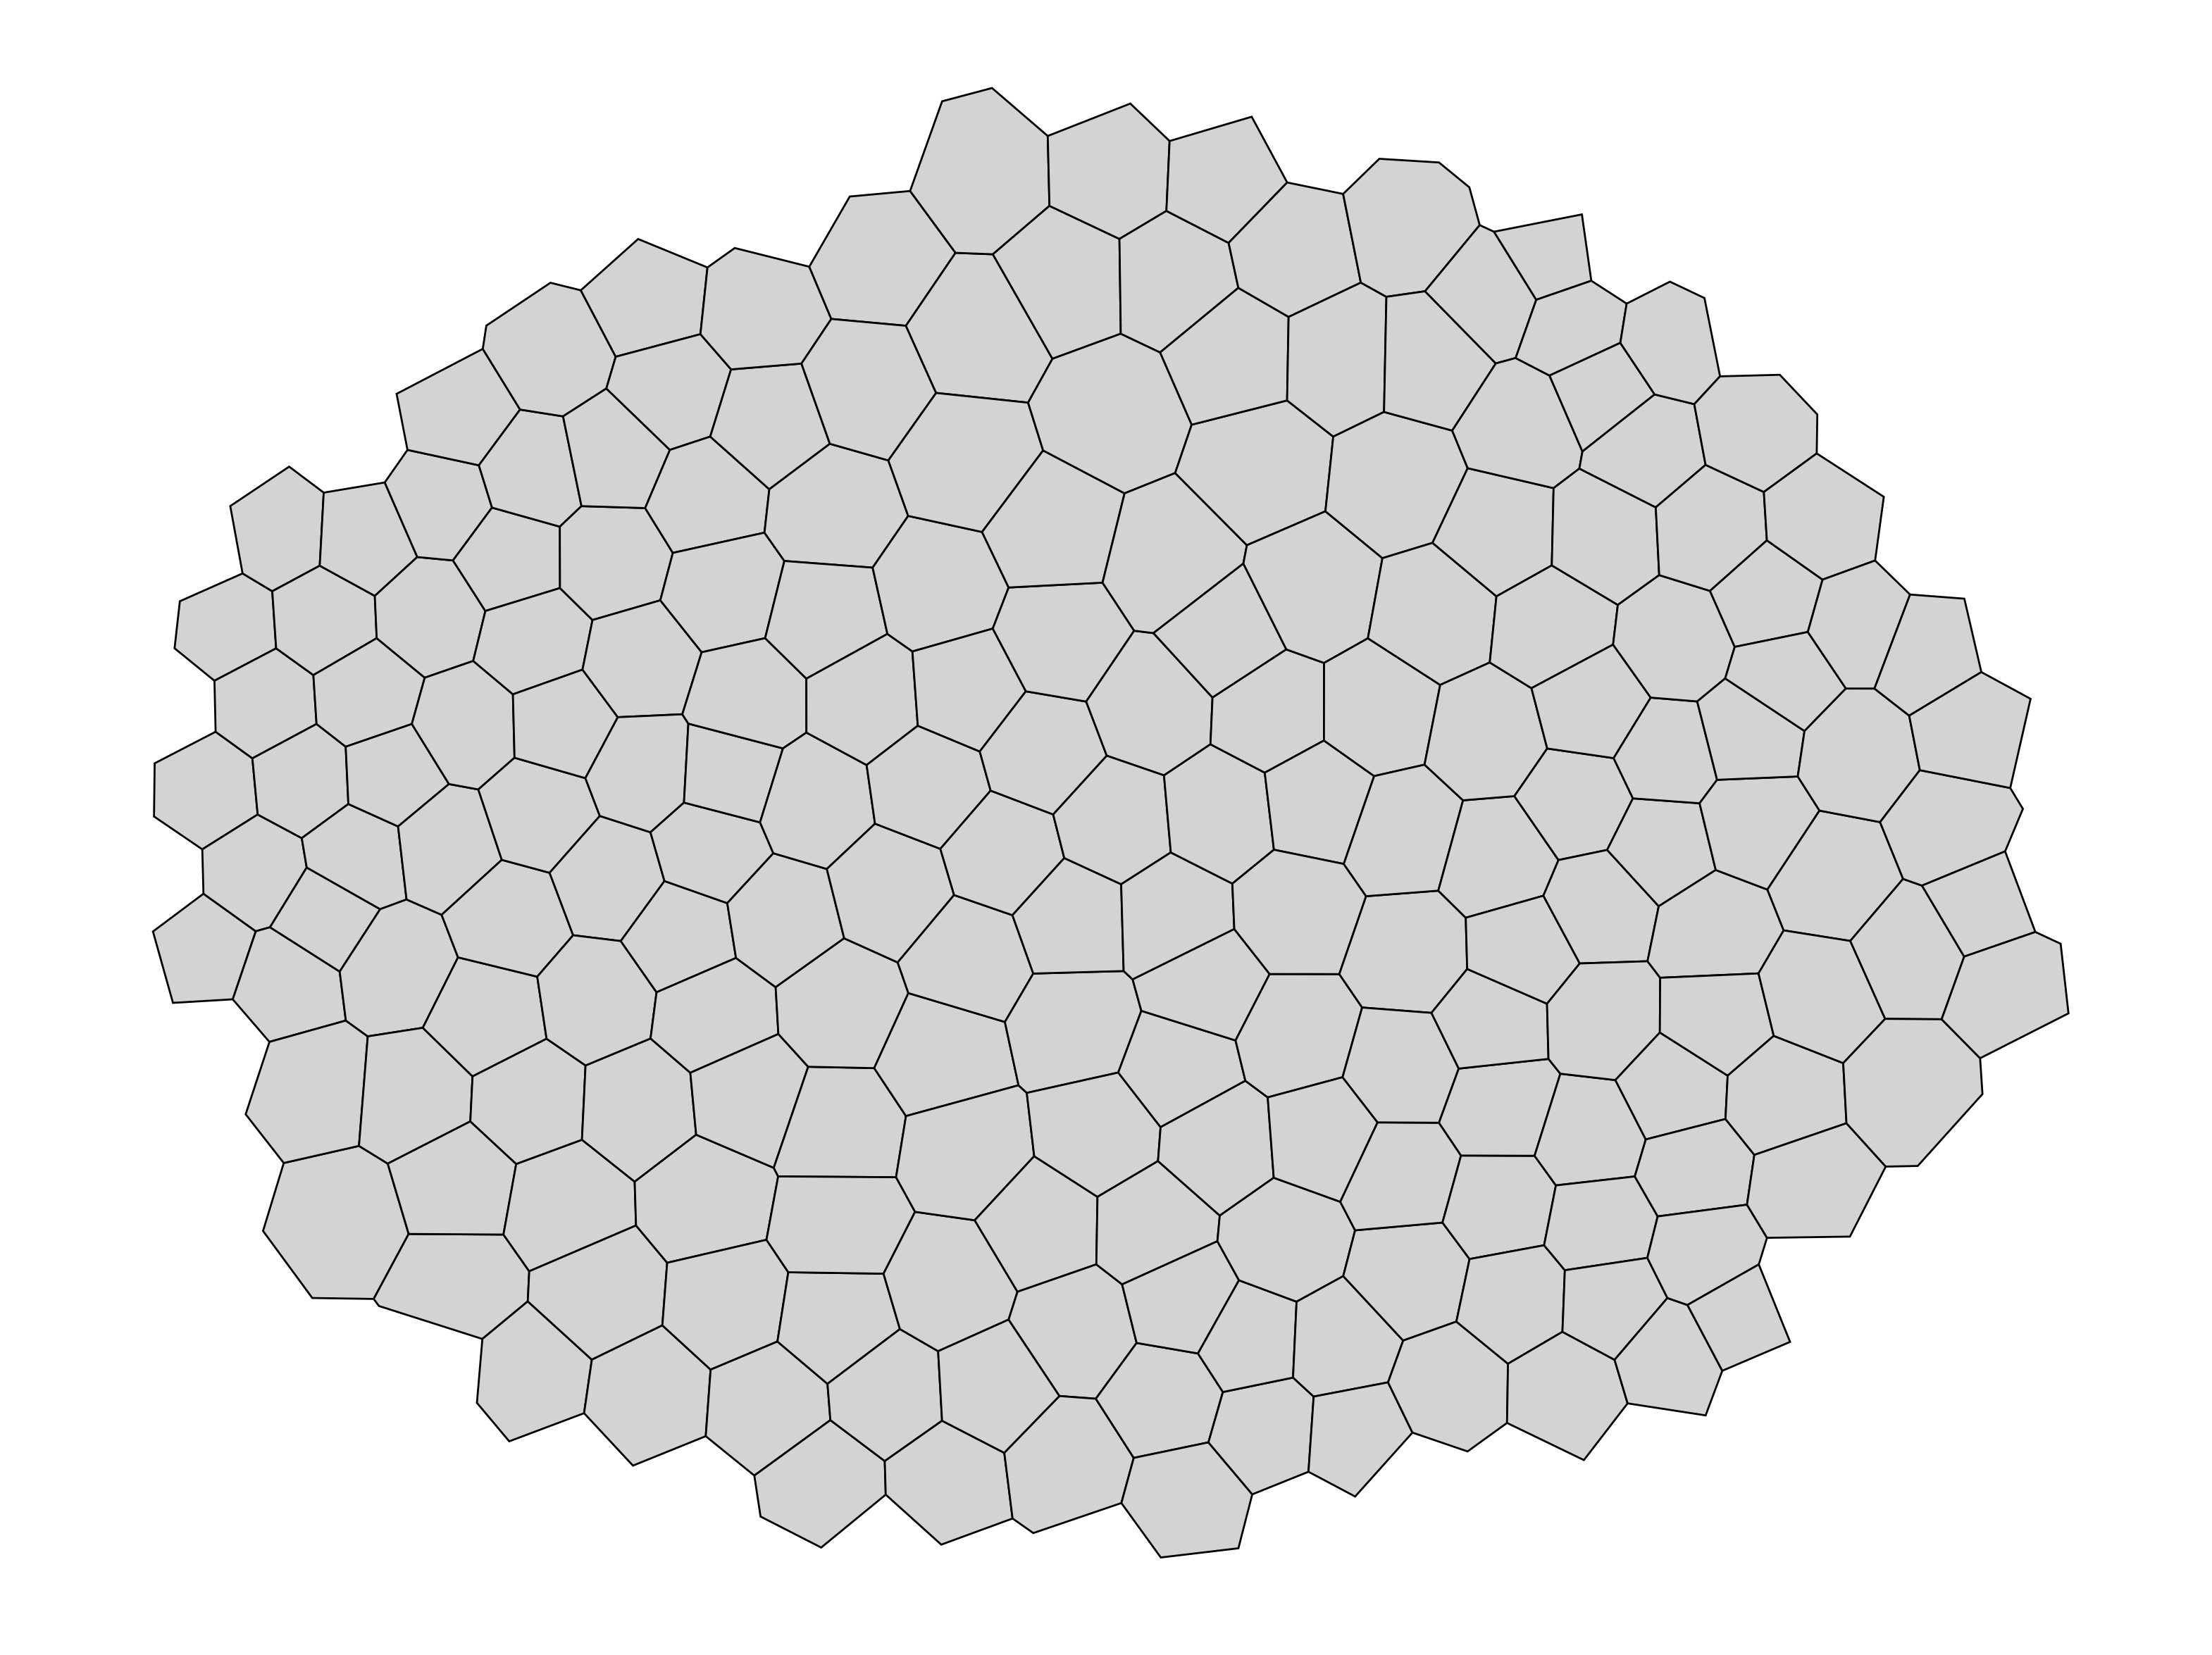

Calculated Node Positions: [[ 677.78173405 -514.30729037]
 [ 678.12330441 -492.8205683 ]
 [ 680.91063071 -471.03034163]
 [ 685.00641428 -504.11730014]
 [ 686.08359557 -481.4796662 ]
 [ 688.91269823 -518.2994209 ]
 [ 688.10283901 -458.98396273]
 [ 691.37571627 -491.76421107]
 [ 694.14530688 -509.97009132]
 [ 696.45683966 -549.61150584]
 [ 692.48422926 -532.16241746]
 [ 693.87845489 -470.39621377]
 [ 698.59676279 -501.8630026 ]
 [ 699.56431158 -459.79248869]
 [ 703.80535692 -516.34107351]
 [ 699.66685452 -480.76317919]
 [ 703.16581886 -491.24855705]
 [ 706.25641302 -533.25085077]
 [ 712.28033131 -558.11024833]
 [ 708.41958044 -469.78641279]
 [ 712.21919139 -544.90052077]
 [ 709.72164975 -455.17849141]
 [ 710.67069203 -500.30853851]
 [ 712.20164968 -443.25991537]
 [ 713.44987479 -484.62837835]
 [ 716.31203332 -522.70970954]
 [ 719.37900555 -462.43349215]
 [ 719.40646396 -510.04732763]
 [ 722.68880775 -473.2456722 ]
 [ 721.9137944  -570.33896381]
 [ 723.2066363  -495.90586928]
 [ 722.43556

In [95]:
G = nx.from_numpy_array(adj_matrix)

plt.figure(figsize=(20, 15), dpi=200)

# Draw the cells using their vertices
for cell in vertices:
    polygon = plt.Polygon(cell, edgecolor='black', facecolor='lightgrey')
    plt.gca().add_patch(polygon)


# Draw the graph with the calculated centroids as positions
nx.draw(G, 
        pos=centroids,  
        node_color='black', 
        node_size=400,
        font_size=12, 
        font_weight='bold',
        alpha=0,
        )
# Save as a png
plt.savefig('graph_representation_blank.png', bbox_inches='tight', dpi=300,
            transparent=True)

plt.show()

print("Calculated Node Positions:", centroids)



In [ ]:
# Get adjacency matrices from Box drive

adj_mat_dictionary = {}

adj_mat_dictionary['adj_mat_1'] = np.loadtxt('C:/Users/steph/Box/Calcium_Imaging_Data/Graph_Representations/adj_mat_1.txt', delimiter=',')